In [4]:
import sys; 
import pandas as pd; 
import seaborn as sns; 
import matplotlib.pyplot as plt; 
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

<h1> classtification with 2 groups

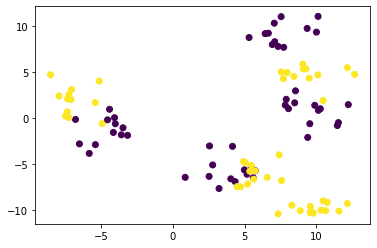

In [7]:
#creating 100 points with 2 classifications
from sklearn.datasets import make_classification, make_blobs
x, y = make_blobs(n_samples = 100, n_features = 2,
                  centers = 8, cluster_std = 1.3,
                  random_state = 4)
y = y % 2
plt.scatter(x[:, 0], x[:, 1], c = y)

In [8]:
#dividing the points into test and train groups
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 0)

0.7733333333333333
0.64


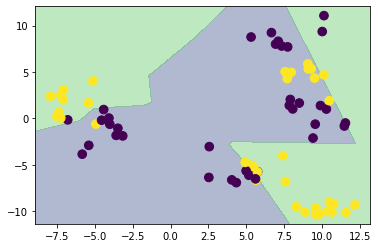

In [6]:
#initialing the model with one layer
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(hidden_layer_sizes = [10], 
                      solver='lbfgs',
                      random_state = 0).fit(X_train, y_train)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, levels=[-1,0,1], alpha = 0.4)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=75)
plt.show()

0.92
0.76


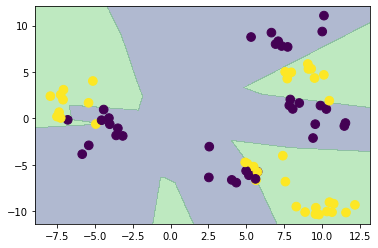

In [9]:
#initialing the model with 2 layers
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(hidden_layer_sizes = [10,10], 
                      solver='lbfgs',
                      random_state = 0).fit(X_train, y_train)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, levels=[-1,0,1], alpha = 0.4)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=75)
plt.show()

<h1> classtification with more groups

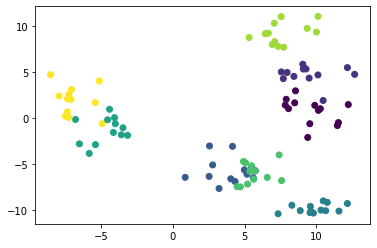

In [10]:
#creating points with make_blobs in 8 categories
from sklearn.datasets import make_classification, make_blobs
x, y = make_blobs(n_samples = 100, n_features = 2,
                  centers = 8, cluster_std = 1.3,
                  random_state = 4)
plt.scatter(x[:, 0], x[:, 1], c = y)

In [12]:
#making model to clastify the points
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 0)
model = MLPClassifier(hidden_layer_sizes = [10, 10], activation = 'tanh', alpha = 5,max_iter=1000000,
                      solver='lbfgs',
                      random_state = 0)
model.fit(X_train, y_train)

MLPClassifier(activation='tanh', alpha=5, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=[10, 10], learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=0, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

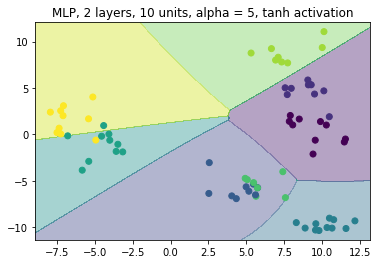

In [13]:
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha = 0.4)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.title('MLP, {} layers, {} units, alpha = {}, {} activation'.format(2, 10, 5, 'tanh'))
plt.savefig('Neural 3 multi class data fit [{}] alpha {}.png'.format(10_10, 5), dpi=350)
plt.show()

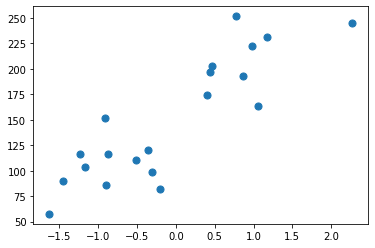

In [199]:
#creating points for regression with make_regression
from sklearn.datasets import make_regression
x, y = make_regression(n_samples = 100, n_features=1,
                       n_informative=1, bias = 150.0,
                       noise = 30, random_state=0)
x = x[0::5]
y = y[0::5]
plt.scatter(x, y, s=50)

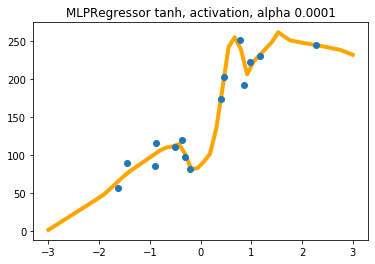

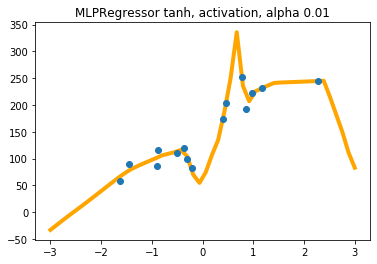

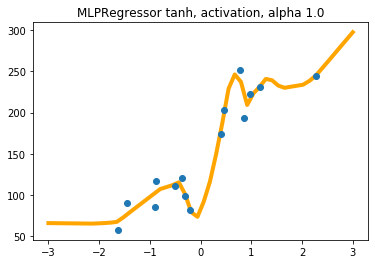

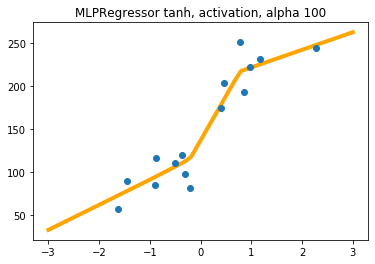

In [172]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split

#dsivide into train and test
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 0)

#making graph with diffrents alphas
for alpha_p in [0.0001, 0.01, 1.0, 100]:

    model = MLPRegressor(hidden_layer_sizes = [100,100],
                         activation = 'relu',
                         alpha = alpha_p,max_iter=1000000,
                         solver = 'lbfgs').fit(X_train, y_train)

    X_range = np.linspace(-3, 3, 50).reshape(-1,1)
    Z = model.predict(X_range)

    plt.plot(X_range, Z, '-k', c = 'orange', linewidth = 4)
    plt.plot(X_train, y_train, 'o')
    plt.title('MLPRegressor {}, activation, alpha {}'.format('tanh', alpha_p))
    
    plt.savefig('Neural 4 regressor data relu alpha {}.png'.format(alpha_p), dpi=350)

    plt.show()

<h1>example from our project:


In [173]:
# Import Cancer data drom the Sklearn library
data = pd.read_csv(r'/Users/gab/Downloads/data.csv')
data =data.iloc[:,1:-1]

In [174]:
#divide into input and wanted output
X = data.drop(['diagnosis'],axis=1)
y = data['diagnosis']

In [175]:
#normalized the data
from scipy.stats import zscore
X_standard = X.apply(zscore)

In [176]:
from sklearn.model_selection import train_test_split
#divide to test and train
X_train, X_test, y_train, y_test = train_test_split(X_standard, y, test_size = 0.25, random_state=5)

In [177]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix


# Define model.
model = MLPClassifier(hidden_layer_sizes = [25, 25], activation = 'relu', alpha = 0.1 ,
                      solver='lbfgs',
                      random_state = 0)

In [178]:
# Fit model
try_model.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

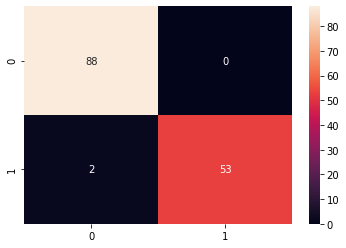

In [179]:
#check prediction
y_predict = try_model.predict(X_test)
cm = confusion_matrix(y_test, y_predict)

sns.heatmap(cm, annot=True)

In [180]:
#accuracy and f1
from sklearn.metrics import accuracy_score, classification_report, f1_score
acc = accuracy_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict, average='macro')
f'The accuracy is %.2f     The f1_score is %.2f' % (acc,f1)

'The accuracy is 0.99     The f1_score is 0.99'